In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
%matplotlib inline

In [3]:
mlc_df=pd.read_csv("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/data/MLC_data.csv")

In [4]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0    ISRC                                      98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  int64  
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [5]:
mlc_df.isnull().sum()

 ISRC                                        1760
Country Code                                 1697
Registrant Code                              1697
Year of Reference                            1761
Usage Period                                 8102
Streaming Platform (DSP)                     3999
Streams                                         0
Recording Artist                                0
Recording Label                              1008
Recording Title                                 0
Release Title                                  69
Recording Duration (Seconds)                    0
Songwriter's Listed (1 = "Yes", 0 = "No")       0
dtype: int64

In [6]:
mlc_df.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,1.95E+11,19,492,33.0,1/1/2021,Spotify,13620,MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1
1,1.96E+11,19,575,70.0,5/1/2021,Pandora,12160,Chris Webby,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1
2,8.60E+11,85,971,57.0,4/1/2021,Amazon,2451,Parry Gripp,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0
3,8.60E+11,85,971,57.0,4/1/2021,Amazon,2451,Parry Gripp,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0
4,8.60E+11,85,971,67.0,3/1/2021,Amazon,3844,Bear McCreary,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0


In [7]:
mlc_df= mlc_df.rename({mlc_df.columns[-1]: 'Songwriters'}, axis=1)

In [8]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    ISRC                         98240 non-null   object 
 1   Country Code                  98303 non-null   object 
 2   Registrant Code               98303 non-null   object 
 3   Year of Reference             98239 non-null   float64
 4   Usage Period                  91898 non-null   object 
 5   Streaming Platform (DSP)      96001 non-null   object 
 6   Streams                       100000 non-null  int64  
 7   Recording Artist              100000 non-null  object 
 8   Recording Label               98992 non-null   object 
 9   Recording Title               100000 non-null  object 
 10  Release Title                 99931 non-null   object 
 11  Recording Duration (Seconds)  100000 non-null  int64  
 12  Songwriters                   100000 non-null

In [9]:
#count missing songwriters
sum(mlc_df.Songwriters == 0)

45839

In [10]:
#count rows with songwriters
sum(mlc_df.Songwriters == 1)

54161

In [11]:
#count number of duplicate values
print(mlc_df.duplicated().value_counts())

False    99451
True       549
dtype: int64


In [12]:
#You can use duplicated() and the negation operator ~ to remove duplicate rows.
mlc_df_new = mlc_df[~mlc_df.duplicated()]

In [13]:
mlc_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99451 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    ISRC                         97701 non-null  object 
 1   Country Code                  97764 non-null  object 
 2   Registrant Code               97764 non-null  object 
 3   Year of Reference             97700 non-null  float64
 4   Usage Period                  91349 non-null  object 
 5   Streaming Platform (DSP)      95452 non-null  object 
 6   Streams                       99451 non-null  int64  
 7   Recording Artist              99451 non-null  object 
 8   Recording Label               98444 non-null  object 
 9   Recording Title               99451 non-null  object 
 10  Release Title                 99382 non-null  object 
 11  Recording Duration (Seconds)  99451 non-null  int64  
 12  Songwriters                   99451 non-null  int64  
dtypes

In [14]:
#avg number of streams for each platform
df_streams_avg = mlc_df_new.groupby(["Streaming Platform (DSP)"]).Streams.mean().reset_index()
print(df_streams_avg)

   Streaming Platform (DSP)       Streams
0                    Amazon  10441.229776
1                   Anghami    753.956522
2                     Apple  72459.358059
3                 AudioMack  21802.834545
4        Classical Archives     10.000000
5                    Deezer   1722.156863
6                 Fan Label     22.750000
7                       GTL   1249.462439
8                 LiveXLive    506.535000
9                   Melodyv   6476.306295
10             Midwest Tape    840.274510
11                 MixCloud    665.250000
12                MonkingMe   3549.000000
13                  NugsNet    351.333333
14                Pacemaker    569.000000
15                  Pandora  63548.230534
16               PowerMusic    394.250000
17                    Qoboz     63.663462
18                  Recisio      1.318182
19              Smithsonian      9.904762
20                    Sonos   1365.304348
21               SoundCloud  78629.932547
22                  Spotify  79231

In [15]:
#total number of streams for each platform
df_streams_sum = mlc_df_new.groupby(["Streaming Platform (DSP)"]).Streams.sum().reset_index()
print(df_streams_sum)

   Streaming Platform (DSP)     Streams
0                    Amazon   149591499
1                   Anghami       34682
2                     Apple  1599105573
3                 AudioMack    11991559
4        Classical Archives          20
5                    Deezer       87830
6                 Fan Label          91
7                       GTL     1280699
8                 LiveXLive      101307
9                   Melodyv     5349429
10             Midwest Tape       85708
11                 MixCloud        2661
12                MonkingMe        3549
13                  NugsNet      110670
14                Pacemaker        1707
15                  Pandora   873279784
16               PowerMusic        3154
17                    Qoboz        6621
18                  Recisio          29
19              Smithsonian         208
20                    Sonos       31402
21               SoundCloud   166695457
22                  Spotify  2541603117
23                    Tidal    48743502


In [16]:
#command to access a different notebook
%run genres.ipynb


In [17]:
from datetime import datetime


In [18]:
mlc_df_new['Usage Period'] = pd.to_datetime(mlc_df_new['Usage Period'])

C:\Users\iulia\AppData\Local\Temp/ipykernel_16688/1540712869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlc_df_new['Usage Period'] = pd.to_datetime(mlc_df_new['Usage Period'])


In [19]:
mlc_df_new['Recording Artist'] = mlc_df_new['Recording Artist'].str.upper()
mlc_df_new['Recording Artist'] = mlc_df_new['Recording Artist'].str.strip()

C:\Users\iulia\AppData\Local\Temp/ipykernel_16688/3699966857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlc_df_new['Recording Artist'] = mlc_df_new['Recording Artist'].str.upper()
C:\Users\iulia\AppData\Local\Temp/ipykernel_16688/3699966857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlc_df_new['Recording Artist'] = mlc_df_new['Recording Artist'].str.strip()


In [20]:
mlc_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99451 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0    ISRC                         97701 non-null  object        
 1   Country Code                  97764 non-null  object        
 2   Registrant Code               97764 non-null  object        
 3   Year of Reference             97700 non-null  float64       
 4   Usage Period                  91349 non-null  datetime64[ns]
 5   Streaming Platform (DSP)      95452 non-null  object        
 6   Streams                       99451 non-null  int64         
 7   Recording Artist              99451 non-null  object        
 8   Recording Label               98444 non-null  object        
 9   Recording Title               99451 non-null  object        
 10  Release Title                 99382 non-null  object        
 11  Recording Duration (Seconds)

In [21]:
mlc_df_new

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,1.95E+11,19,492,33.0,2021-01-01,Spotify,13620,MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1
1,1.96E+11,19,575,70.0,2021-05-01,Pandora,12160,CHRIS WEBBY,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1
2,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0
4,8.60E+11,85,971,67.0,2021-03-01,Amazon,3844,BEAR MCCREARY,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0
5,8.60E+11,85,971,67.0,2021-04-01,Amazon,10013,VARIOUS ARTISTS,Cobra Entertainment LLC,"The Marriage of Figaro, K. 92: Cherubins Song ...",100 Must-Have Lullaby Baby Classics,164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaT,NaN,4032,ISRAEL KAMAKAWIWO'OLE,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0
99996,NaN,NaN,NaN,NaN,NaT,NaN,765650,ISRAEL KAMAKAWIWO'OLE,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0
99997,NaN,NaN,NaN,NaN,NaT,NaN,3705,DANNY CARVALHO,Lava Rock Music,Song For Allie,Slack Key Journey - On My Way,206,0
99998,NaN,NaN,NaN,NaN,NaT,NaN,3279,KATZEN WASCHER,Katzen Wascher,Soul Plug,High Voltage,261,0


In [22]:
df_mlc_and_genres = pd.merge(mlc_df_new,df_genres, on=['Recording Artist'],how = 'left')

In [23]:
df_mlc_and_genres

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters,Genre
0,1.95E+11,19,492,33.0,2021-01-01,Spotify,13620,MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1,NaN
1,1.96E+11,19,575,70.0,2021-05-01,Pandora,12160,CHRIS WEBBY,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1,HIP HOP
2,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0,ROCK
3,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0,CHILDREN'S MUSIC
4,8.60E+11,85,971,67.0,2021-03-01,Amazon,3844,BEAR MCCREARY,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0,FILM SCORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166894,NaN,NaN,NaN,NaN,NaT,NaN,765650,ISRAEL KAMAKAWIWO'OLE,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0,HAWAIIAN
166895,NaN,NaN,NaN,NaN,NaT,NaN,3705,DANNY CARVALHO,Lava Rock Music,Song For Allie,Slack Key Journey - On My Way,206,0,NaN
166896,NaN,NaN,NaN,NaN,NaT,NaN,3279,KATZEN WASCHER,Katzen Wascher,Soul Plug,High Voltage,261,0,NaN
166897,NaN,NaN,NaN,NaN,NaT,NaN,11258,ADAM CALHOUN,ACal,Stand Tall,War,182,0,MIDWEST HIP HOP


In [24]:
#null values count
df_mlc_and_genres.isnull().sum()

 ISRC                            2892
Country Code                     2790
Registrant Code                  2790
Year of Reference                2895
Usage Period                    13139
Streaming Platform (DSP)         6064
Streams                             0
Recording Artist                    0
Recording Label                  2005
Recording Title                     0
Release Title                     146
Recording Duration (Seconds)        0
Songwriters                         0
Genre                           66971
dtype: int64

In [25]:
#nonnull values count
df_mlc_and_genres.notnull().sum()

 ISRC                           164007
Country Code                    164109
Registrant Code                 164109
Year of Reference               164004
Usage Period                    153760
Streaming Platform (DSP)        160835
Streams                         166899
Recording Artist                166899
Recording Label                 164894
Recording Title                 166899
Release Title                   166753
Recording Duration (Seconds)    166899
Songwriters                     166899
Genre                            99928
dtype: int64

In [26]:
df_mlc_and_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166899 entries, 0 to 166898
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0    ISRC                         164007 non-null  object        
 1   Country Code                  164109 non-null  object        
 2   Registrant Code               164109 non-null  object        
 3   Year of Reference             164004 non-null  float64       
 4   Usage Period                  153760 non-null  datetime64[ns]
 5   Streaming Platform (DSP)      160835 non-null  object        
 6   Streams                       166899 non-null  int64         
 7   Recording Artist              166899 non-null  object        
 8   Recording Label               164894 non-null  object        
 9   Recording Title               166899 non-null  object        
 10  Release Title                 166753 non-null  object        
 11  Recording Dur

In [27]:
df_mlc_and_genres

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters,Genre
0,1.95E+11,19,492,33.0,2021-01-01,Spotify,13620,MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1,NaN
1,1.96E+11,19,575,70.0,2021-05-01,Pandora,12160,CHRIS WEBBY,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1,HIP HOP
2,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0,ROCK
3,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0,CHILDREN'S MUSIC
4,8.60E+11,85,971,67.0,2021-03-01,Amazon,3844,BEAR MCCREARY,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0,FILM SCORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166894,NaN,NaN,NaN,NaN,NaT,NaN,765650,ISRAEL KAMAKAWIWO'OLE,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0,HAWAIIAN
166895,NaN,NaN,NaN,NaN,NaT,NaN,3705,DANNY CARVALHO,Lava Rock Music,Song For Allie,Slack Key Journey - On My Way,206,0,NaN
166896,NaN,NaN,NaN,NaN,NaT,NaN,3279,KATZEN WASCHER,Katzen Wascher,Soul Plug,High Voltage,261,0,NaN
166897,NaN,NaN,NaN,NaN,NaT,NaN,11258,ADAM CALHOUN,ACal,Stand Tall,War,182,0,MIDWEST HIP HOP


In [28]:
df_mlc_and_genres_gr = df_mlc_and_genres.groupby(["Usage Period","Genre"])['Streams'].sum().reset_index()
df_mlc_and_genres_gr

,Usage Period,Genre,Streams
0,2021-01-01,,1157651
1,2021-01-01,(EARLY),12306
2,2021-01-01,A CAPPELLA,1931486
3,2021-01-01,A-POP,358736
4,2021-01-01,ABSOLUTE MUSIC,117008
...,...,...,...
2946,2021-05-01,WORLD,644168
2947,2021-05-01,WORLDBEAT,1528
2948,2021-05-01,WORSHIP,2689
2949,2021-05-01,WORSHIP MUSIC,5288


In [29]:
df_jan = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-01-01'].reset_index()
df_feb = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-02-01'].reset_index()
df_mar = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-03-01'].reset_index()
df_apr = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-04-01'].reset_index()
df_may = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-05-01'].reset_index()

In [30]:
df_jan_top10 = df_jan.nlargest(10,'Streams').reset_index()
df_jan_top10

,level_0,index,Usage Period,Genre,Streams
0,300,300,2021-01-01,HIP HOP,371113746
1,616,616,2021-01-01,TRAP,143473703
2,504,504,2021-01-01,R&B,110259890
3,458,458,2021-01-01,POP,104052425
4,154,154,2021-01-01,COUNTRY,75963242
5,265,265,2021-01-01,GANGSTA RAP,68568379
6,463,463,2021-01-01,POP ROCK,65003316
7,197,197,2021-01-01,DRILL,48907181
8,161,161,2021-01-01,COUNTRY ROCK,46364451
9,572,572,2021-01-01,SOUTHERN HIP HOP,41272328


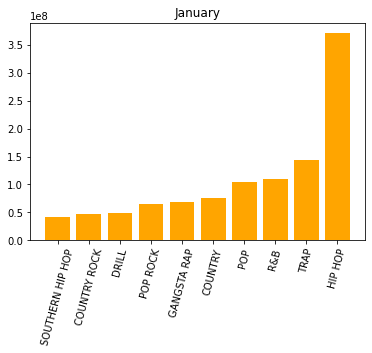

In [31]:
data = df_jan_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data, color ='orange')
plt.xticks(rotation = 75)
plt.title('January');

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


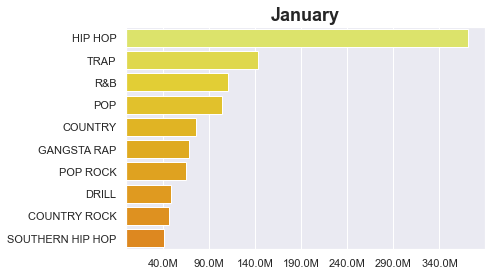

In [32]:
#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_jan_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_jan_top10 = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",errwidth=0)
#g.set(xlabel=None,ylabel=None,title="January")
g_jan_top10.set_xlabel(None)
g_jan_top10.set_ylabel(None)
g_jan_top10.set_title("January",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(40000000,max(data['Streams']),50000000))
g_jan_top10.xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()
#save visual as a file
plt.savefig("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/visuals/jan_top10.png");

In [33]:
df_feb_top10 =df_feb.nlargest(10,'Streams').reset_index()
df_feb_top10

,level_0,index,Usage Period,Genre,Streams
0,290,946,2021-02-01,HIP HOP,132195488
1,579,1235,2021-02-01,TRAP,56086068
2,479,1135,2021-02-01,R&B,30590741
3,432,1088,2021-02-01,POP,26882778
4,259,915,2021-02-01,GANGSTA RAP,24536003
5,188,844,2021-02-01,DRILL,22120886
6,542,1198,2021-02-01,SOUTHERN HIP HOP,17578021
7,222,878,2021-02-01,EMO RAP,15122244
8,147,803,2021-02-01,COUNTRY,14175417
9,439,1095,2021-02-01,POP ROCK,12571089


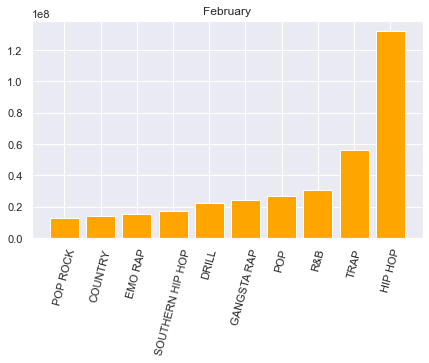

In [34]:
data = df_feb_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data, color ='orange')
plt.xticks(rotation = 75)
plt.title('February');

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


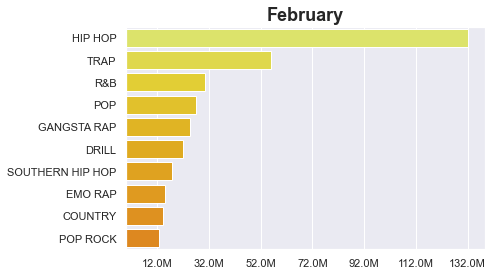

In [35]:
#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_feb_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_feb_top10 = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",errwidth=0)
#g.set(xlabel=None,ylabel=None,title="January")
g_feb_top10.set_xlabel(None)
g_feb_top10.set_ylabel(None)
g_feb_top10.set_title("February",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(12000000,max(data['Streams']),20000000))
g_feb_top10.xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()
plt.savefig("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/visuals/feb_top10.png");

In [36]:
df_mar_top10 = df_mar.nlargest(10,'Streams').reset_index()
df_mar_top10

,level_0,index,Usage Period,Genre,Streams
0,349,1619,2021-03-01,HIP HOP,351515145
1,671,1941,2021-03-01,TRAP,164794316
2,559,1829,2021-03-01,R&B,113264486
3,512,1782,2021-03-01,POP,96580134
4,307,1577,2021-03-01,GANGSTA RAP,58821429
5,219,1489,2021-03-01,DRILL,55186037
6,232,1502,2021-03-01,EDM,30018267
7,172,1442,2021-03-01,COUNTRY,28208131
8,40,1310,2021-03-01,ALTERNATIVE ROCK,26807188
9,259,1529,2021-03-01,EMO RAP,22116578


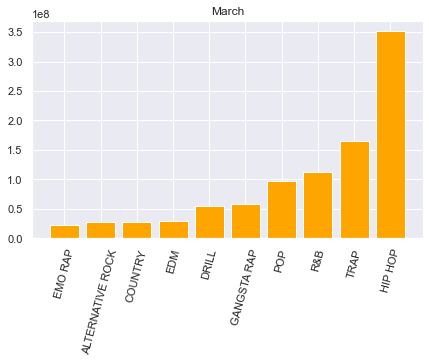

In [37]:
data = df_mar_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data,color ='orange')
plt.xticks(rotation = 75)
plt.title('March');

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


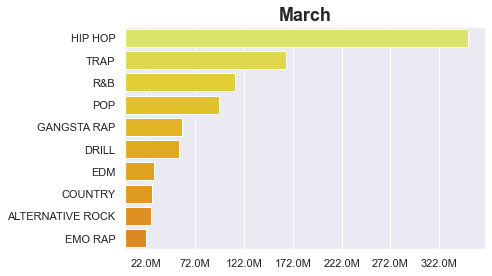

In [38]:
#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_mar_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_mar_top10 = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",errwidth=0)
#g.set(xlabel=None,ylabel=None,title="January")
g_mar_top10 .set_xlabel(None)
g_mar_top10 .set_ylabel(None)
g_mar_top10 .set_title("March",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(22000000,max(data['Streams']),50000000))
g_mar_top10 .xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()
plt.savefig("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/visuals/mar_top10.png");

In [39]:
df_apr_top10 = df_apr.nlargest(10,'Streams').reset_index()
df_apr_top10

,level_0,index,Usage Period,Genre,Streams
0,226,2209,2021-04-01,HIP HOP,184022292
1,371,2354,2021-04-01,R&B,81015758
2,453,2436,2021-04-01,TRAP,78800267
3,338,2321,2021-04-01,POP,55842096
4,418,2401,2021-04-01,SOUL-TRAP,39686416
5,174,2157,2021-04-01,FOLK,35254013
6,384,2367,2021-04-01,ROCK,29413108
7,137,2120,2021-04-01,DRILL,25485421
8,111,2094,2021-04-01,COUNTRY,25454089
9,15,1998,2021-04-01,ALTERNATIVE,23231000


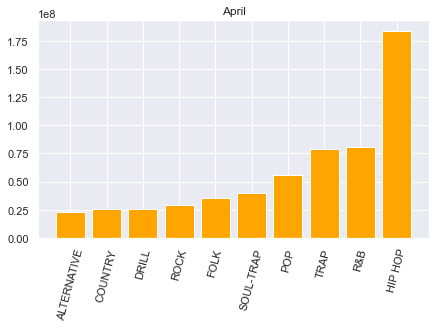

In [40]:
data = df_apr_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data,color ='orange')
plt.xticks(rotation = 75)
plt.title('April');

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


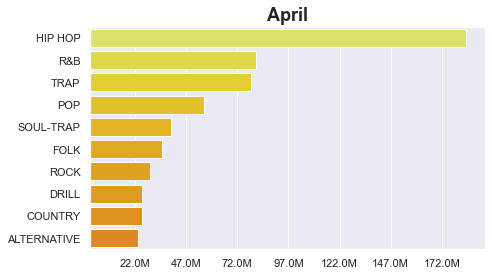

In [41]:
#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_apr_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_apr_top10  = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",errwidth=0)
#g.set(xlabel=None,ylabel=None,title="January")
g_apr_top10.set_xlabel(None)
g_apr_top10.set_ylabel(None)
g_apr_top10.set_title("April",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(22000000,max(data['Streams']),25000000))
g_apr_top10.xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()
plt.savefig("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/visuals/apr_top10.png");

In [42]:
df_may_top10 = df_may.nlargest(10,'Streams').reset_index()
df_may_top10

,level_0,index,Usage Period,Genre,Streams
0,238,2700,2021-05-01,HIP HOP,123628275
1,462,2924,2021-05-01,TRAP,60130863
2,348,2810,2021-05-01,POP,49868646
3,386,2848,2021-05-01,R&B,32569906
4,402,2864,2021-05-01,ROCK,31594537
5,116,2578,2021-05-01,COUNTRY,30699639
6,186,2648,2021-05-01,FOLK,29560224
7,12,2474,2021-05-01,ALTERNATIVE,28899839
8,148,2610,2021-05-01,DRILL,16852823
9,203,2665,2021-05-01,GANGSTA RAP,15789531


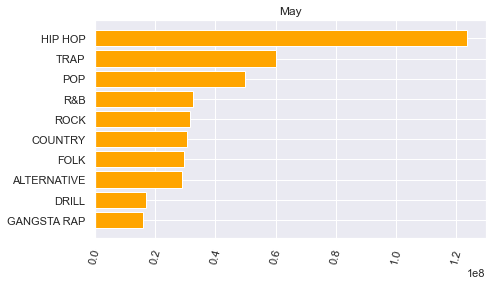

In [43]:
data = df_may_top10.sort_values('Streams')
plt.barh('Genre', 'Streams', data = data ,color ='orange')
plt.xticks(rotation = 75)
plt.title('May');

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


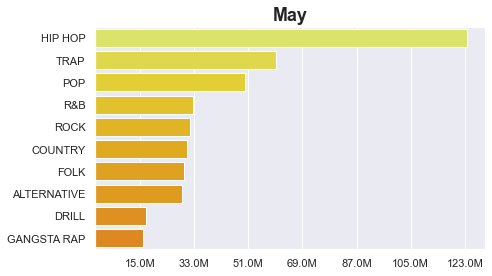

In [44]:
#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_may_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_may_top10 = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",errwidth=0)
#g.set(xlabel=None,ylabel=None,title="January")
g_may_top10.set_xlabel(None)
g_may_top10.set_ylabel(None)
g_may_top10.set_title("May",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(15000000,max(data['Streams']),18000000))
g_may_top10.xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()
plt.savefig("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/visuals/may_top10.png");

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


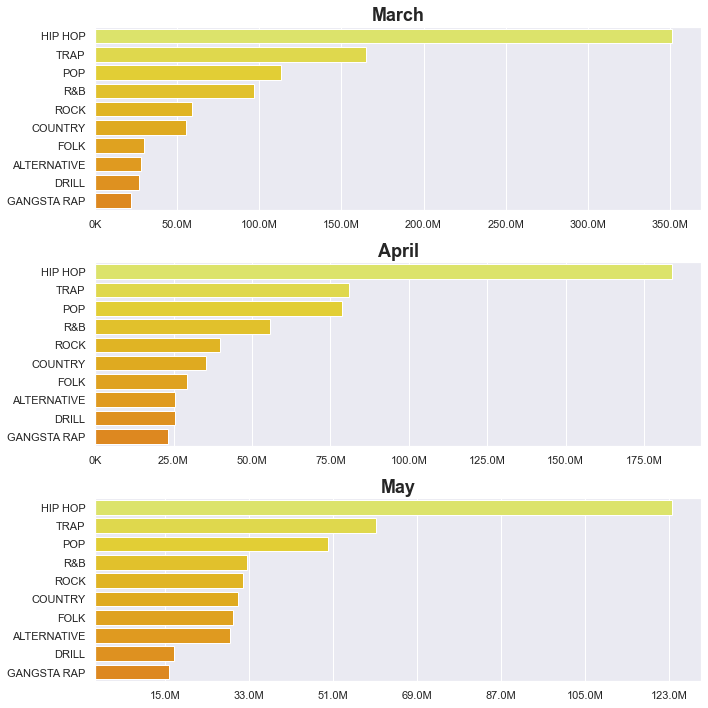

In [45]:
fig, axes = plt.subplots(3,1, figsize=(10,10), sharey=True)


#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_mar_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_mar_top10 = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",ax=axes[0])
#g.set(xlabel=None,ylabel=None,title="January")
g_mar_top10 .set_xlabel(None)
g_mar_top10 .set_ylabel(None)
g_mar_top10 .set_title("March",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(22000000,max(data['Streams']),50000000))
g_mar_top10 .xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()


#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_apr_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_apr_top10  = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",ax=axes[1])
#g.set(xlabel=None,ylabel=None,title="January")
g_apr_top10.set_xlabel(None)
g_apr_top10.set_ylabel(None)
g_apr_top10.set_title("April",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(22000000,max(data['Streams']),25000000))
g_apr_top10.xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()


def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_may_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_may_top10 = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",ax=axes[2])
#g.set(xlabel=None,ylabel=None,title="January")
g_may_top10.set_xlabel(None)
g_may_top10.set_ylabel(None)
g_may_top10.set_title("May",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(15000000,max(data['Streams']),18000000))
g_may_top10.xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()

plt.savefig("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/visuals/fig1.png");

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


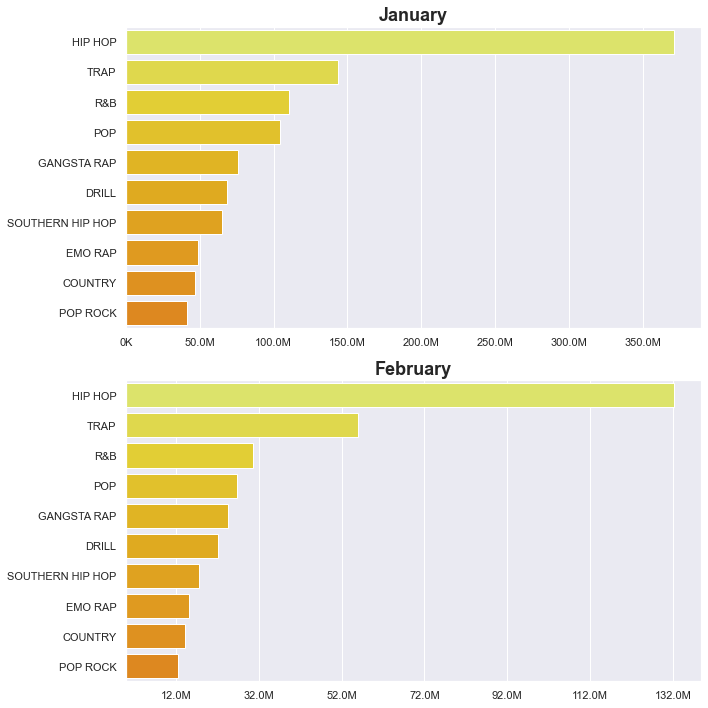

In [46]:
fig, axes = plt.subplots(2,1, figsize=(10,10), sharey=True)

#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_jan_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_jan_top10 = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",ax=axes[0])
#g.set(xlabel=None,ylabel=None,title="January")
g_jan_top10.set_xlabel(None)
g_jan_top10.set_ylabel(None)
g_jan_top10.set_title("January",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(40000000,max(data['Streams']),50000000))
g_jan_top10.xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()


#function to set the format for "Streams"
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter    
    
data = df_feb_top10.sort_values('Streams',ascending=False)
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g_feb_top10 = sns.barplot('Streams','Genre', data = data,orient="h", palette = "Wistia",ax=axes[1])
#g.set(xlabel=None,ylabel=None,title="January")
g_feb_top10.set_xlabel(None)
g_feb_top10.set_ylabel(None)
g_feb_top10.set_title("February",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
#assigned interval value between each stack
plt.xticks(np.arange(12000000,max(data['Streams']),20000000))
g_feb_top10.xaxis.set_major_formatter(format_number)
#method to fit the graph inside the window
plt.tight_layout()
plt.savefig("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/visuals/fig2.png");

In [47]:
top5_genres_streamed = df_mlc_and_genres_gr.nlargest(15,'Streams').reset_index()
print(top5_genres_streamed)

    index Usage Period        Genre    Streams
0     300   2021-01-01      HIP HOP  371113746
1    1619   2021-03-01      HIP HOP  351515145
2    2209   2021-04-01      HIP HOP  184022292
3    1941   2021-03-01         TRAP  164794316
4     616   2021-01-01         TRAP  143473703
5     946   2021-02-01      HIP HOP  132195488
6    2700   2021-05-01      HIP HOP  123628275
7    1829   2021-03-01          R&B  113264486
8     504   2021-01-01          R&B  110259890
9     458   2021-01-01          POP  104052425
10   1782   2021-03-01          POP   96580134
11   2354   2021-04-01          R&B   81015758
12   2436   2021-04-01         TRAP   78800267
13    154   2021-01-01      COUNTRY   75963242
14    265   2021-01-01  GANGSTA RAP   68568379


In [48]:
#create a list of top streaming genres and remove duplicates
top5_genres = top5_genres_streamed["Genre"].tolist()
top5_genres = list(dict.fromkeys(top5_genres))
top5_genres

['HIP HOP', 'TRAP', 'R&B', 'POP', 'COUNTRY', 'GANGSTA RAP']

In [49]:
top_streaming_genres = df_mlc_and_genres_gr[df_mlc_and_genres_gr['Genre'].isin(top5_genres)].reset_index()
top_streaming_genres = top_streaming_genres.sort_values('Usage Period')
top_streaming_genres.head()

,index,Usage Period,Genre,Streams
0,154,2021-01-01,COUNTRY,75963242
1,265,2021-01-01,GANGSTA RAP,68568379
2,300,2021-01-01,HIP HOP,371113746
3,458,2021-01-01,POP,104052425
4,504,2021-01-01,R&B,110259890


In [50]:
#create a new column to just have month name
month = top_streaming_genres['Usage Period'].dt.month_name(locale = 'English')
top_streaming_genres['Month'] = month
top_streaming_genres.head()

,index,Usage Period,Genre,Streams,Month
0,154,2021-01-01,COUNTRY,75963242,January
1,265,2021-01-01,GANGSTA RAP,68568379,January
2,300,2021-01-01,HIP HOP,371113746,January
3,458,2021-01-01,POP,104052425,January
4,504,2021-01-01,R&B,110259890,January


In [51]:
top_streaming_genres.min()

index                           154
Usage Period    2021-01-01 00:00:00
Genre                       COUNTRY
Streams                    14175417
Month                         April
dtype: object

In [52]:
top_streaming_genres.max()

index                          2924
Usage Period    2021-05-01 00:00:00
Genre                          TRAP
Streams                   371113746
Month                           May
dtype: object

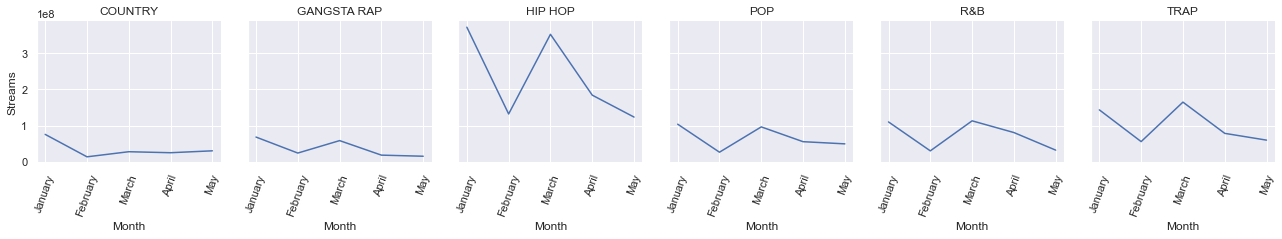

In [53]:
g = sns.FacetGrid(top_streaming_genres, col='Genre')
g.map(sns.lineplot,"Month","Streams")
g.set_xticklabels(rotation=70)
g.set_titles(col_template = "{col_name}");

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


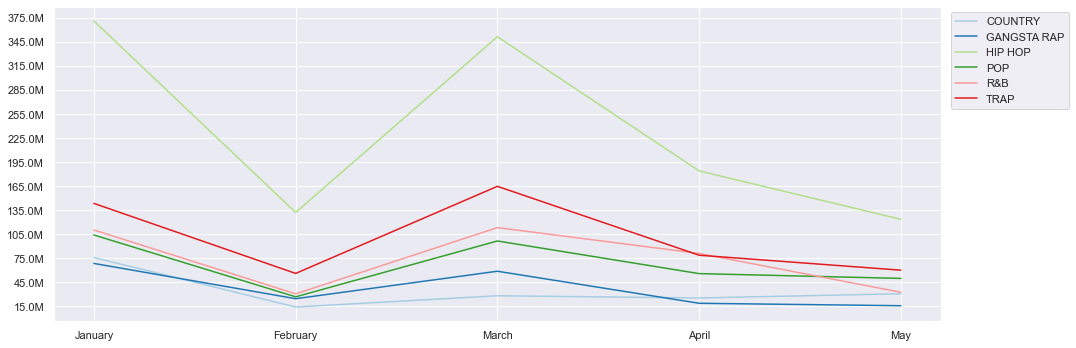

In [69]:
def format_number(data_value,index):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter 

sns.set(rc={"figure.figsize":(15,5)})
g = sns.lineplot('Month', 'Streams', ci=None, hue='Genre', data=top_streaming_genres,palette ="Paired")
g.set_xlabel(None)
g.set_ylabel(None)
g.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.yticks(np.arange(15000000,380000000,30000000))
g.yaxis.set_major_formatter(format_number)
plt.tight_layout()
plt.savefig("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/visuals/fig3.png");

In [55]:
df_mlc_and_genres_dsp = df_mlc_and_genres.groupby(["Streaming Platform (DSP)","Usage Period","Genre"])['Streams'].sum().reset_index()
df_mlc_and_genres_dsp

,Streaming Platform (DSP),Usage Period,Genre,Streams
0,Amazon,2021-01-01,A CAPPELLA,7322
1,Amazon,2021-01-01,ACID ROCK,19784
2,Amazon,2021-01-01,ADULT CONTEMPORARY,14853
3,Amazon,2021-01-01,ALT-POP,2314
4,Amazon,2021-01-01,ALTERNATIVE,217564
...,...,...,...,...
7669,iHeart Radio,2021-02-01,TROPICAL HOUSE,1670
7670,iHeart Radio,2021-02-01,URBAN,1896
7671,iHeart Radio,2021-02-01,URBAN CONTEMPORARY,1815
7672,iHeart Radio,2021-02-01,URBAN CONTEMPORARY GOSPEL,11006


In [56]:
month = df_mlc_and_genres_dsp['Usage Period'].dt.month_name(locale = 'English')
df_mlc_and_genres_dsp['Month'] = month
df_mlc_and_genres_dsp

,Streaming Platform (DSP),Usage Period,Genre,Streams,Month
0,Amazon,2021-01-01,A CAPPELLA,7322,January
1,Amazon,2021-01-01,ACID ROCK,19784,January
2,Amazon,2021-01-01,ADULT CONTEMPORARY,14853,January
3,Amazon,2021-01-01,ALT-POP,2314,January
4,Amazon,2021-01-01,ALTERNATIVE,217564,January
...,...,...,...,...,...
7669,iHeart Radio,2021-02-01,TROPICAL HOUSE,1670,February
7670,iHeart Radio,2021-02-01,URBAN,1896,February
7671,iHeart Radio,2021-02-01,URBAN CONTEMPORARY,1815,February
7672,iHeart Radio,2021-02-01,URBAN CONTEMPORARY GOSPEL,11006,February


In [57]:
dsp_streams = df_mlc_and_genres_dsp.groupby(["Streaming Platform (DSP)"])['Streams'].sum().reset_index()

In [58]:
df_top5_dsp =dsp_streams.nlargest(5,"Streams")
df_top5_dsp

,Streaming Platform (DSP),Streams
2,Apple,2190678513
20,Spotify,1814681604
13,Pandora,1422234612
19,SoundCloud,283065418
0,Amazon,181587666


In [59]:
dsp = df_top5_dsp["Streaming Platform (DSP)"].tolist()
dsp

['Apple', 'Spotify', 'Pandora', 'SoundCloud', 'Amazon']

In [60]:
df_top5_dsp = df_mlc_and_genres_dsp[df_mlc_and_genres_dsp["Streaming Platform (DSP)"].isin(dsp)]
df_top5_dsp

,Streaming Platform (DSP),Usage Period,Genre,Streams,Month
0,Amazon,2021-01-01,A CAPPELLA,7322,January
1,Amazon,2021-01-01,ACID ROCK,19784,January
2,Amazon,2021-01-01,ADULT CONTEMPORARY,14853,January
3,Amazon,2021-01-01,ALT-POP,2314,January
4,Amazon,2021-01-01,ALTERNATIVE,217564,January
...,...,...,...,...,...
6527,Spotify,2021-05-01,VOGUE,251745,May
6528,Spotify,2021-05-01,WEST COAST HIP HOP,96471,May
6529,Spotify,2021-05-01,WESTERN,81831,May
6530,Spotify,2021-05-01,WITCH HOUSE,43486,May


In [61]:
df_amazon = df_top5_dsp[df_top5_dsp["Streaming Platform (DSP)"] == 'Amazon'].reset_index()
df_apple = df_top5_dsp[df_top5_dsp["Streaming Platform (DSP)"] == 'Apple'].reset_index()
df_pandora = df_top5_dsp[df_top5_dsp["Streaming Platform (DSP)"] == 'Pandora'].reset_index()
df_soundcloud = df_top5_dsp[df_top5_dsp["Streaming Platform (DSP)"] == 'SoundCloud'].reset_index()
df_spotify = df_top5_dsp[df_top5_dsp["Streaming Platform (DSP)"] == 'Spotify'].reset_index()

In [71]:
df_amazon.dropna()

,index,Streaming Platform (DSP),Usage Period,Genre,Streams,Month
0,0,Amazon,2021-01-01,A CAPPELLA,7322,January
1,1,Amazon,2021-01-01,ACID ROCK,19784,January
2,2,Amazon,2021-01-01,ADULT CONTEMPORARY,14853,January
3,3,Amazon,2021-01-01,ALT-POP,2314,January
4,4,Amazon,2021-01-01,ALTERNATIVE,217564,January
...,...,...,...,...,...,...
1400,1400,Amazon,2021-05-01,WORLD,507447,May
1401,1401,Amazon,2021-05-01,WORLDBEAT,1528,May
1402,1402,Amazon,2021-05-01,WORSHIP,2689,May
1403,1403,Amazon,2021-05-01,WORSHIP MUSIC,5288,May


In [72]:
df_amazon_pivot = df_amazon.pivot(index="Month",columns="Genre",values="Streams")
df_amazon_pivot

Genre,,A CAPPELLA,ACID HOUSE,ACID ROCK,ACID ROCK (EARLY),ACOUSTIC POP,ACOUSTIC ROCK,ADULT ALTERNATIVE,ADULT CONTEMPORARY,ADULT CONTEMPORARY/POP,AFROBEATS,ALT-COUNTRY,ALT-JAZZ,ALT-POP,ALTERNATIVE,ALTERNATIVE COUNTRY,ALTERNATIVE DANCE,ALTERNATIVE HIP HOP,ALTERNATIVE METAL,ALTERNATIVE POP,ALTERNATIVE R&B,ALTERNATIVE ROCK,AMBIENT,AMERICANA,AMERICANA (MUSIC),ANISON,ARENA ROCK,ARENA ROCK,ART POP,ART PUNK,ART ROCK,AVANT-FUNK,AVANT-GARDE,AVANT-GARDE JAZZ,AVANT-POP,AVANT-SOUL,BACHATA,BAKERSFIELD SOUND,BAROQUE,BAROQUE POP,BASS HOUSE,BEAT,BEDROOM POP,BIG BAND,BIG BEAT,BIG ROOM HOUSE,BLACK COMEDY,BLACK METAL,BLUE COMEDY,BLUE-EYED SOUL,BLUEGRASS,BLUES,BLUES AND ROOTS,BLUES ROCK,BLUES ROCK (EARLY),BLUES-ROCK,BOOGIE,BOOGIE ROCK,BOSSA NOVA,BREAKBEAT,BREAKSTEP,BRITISH BLUES,BRITISH HIP HOP,BRITPOP,BRO-COUNTRY,BROADWAY,BROOKLYN DRILL,BUBBLEGUM DANCE,BUBBLEGUM POP,CALYPSO,CANCIÓN MELÓDICA,CCM,CEDM,CELLO ROCK,CELTIC,CELTIC PUNK,CELTIC ROCK,CHAMBER,CHAMBER MUSIC,CHAMBER POP,CHANSON,CHILDREN'S,CHILDREN'S MUSIC,CHILDREN'S MUSICCHILDREN'S LITERATURE,CHILL-OUT,CHILLOUT,CHILLWAVE,CHIPTUNE,CHOPPER,CHRISTIAN,CHRISTIAN HIP HOP,CHRISTIAN POP,CHRISTIAN ROCK,CHRISTIAN/GOSPEL,CHRISTMAS,CLASSIC MUSIC,CLASSICAL,CLASSICAL CROSSOVER,CLASSICAL MUSIC,CLASSICAL RELIGIOUS,CLEAN COMEDY,CLOUD RAP,COLD WAVE,COLLEGE ROCK,COMEDY,COMEDY HIP HOP,CONSCIOUS RAP,CONTEMPORARY,CONTEMPORARY CHRISTIAN,CONTEMPORARY CHRISTIAN MUSIC,CONTEMPORARY CLASSICAL,CONTEMPORARY CLASSICAL MUSIC,CONTEMPORARY COUNTRY,CONTEMPORARY FOLK,CONTEMPORARY GOSPEL,CONTEMPORARY JAZZ,CONTEMPORARY JEWISH RELIGIOUS MUSIC,CONTEMPORARY R&B,CONTEMPORARY WORSHIP,CONTEMPORARY WORSHIP MUSIC,COOL JAZZ,CORRIDOS,COUNTRY,COUNTRY BLUES,COUNTRY FOLK,COUNTRY MUSIC,COUNTRY POP,COUNTRY RAP,COUNTRY ROCK,COWPUNK,CRINGE COMEDY,CRUNK,CRUNKCORE,CUMBIA,CUMBIA SINFÓNICA,DANCE,DANCE POP,DANCE-POP,DANCE-PUNK,DANCE-ROCK,DANCEHALL,DARK CABARET,DARK WAVE,DEADPAN,DEATHCORE,DEATHCORE (EARLY),DEEP HOUSE,DIRTY RAP,DIRTY SOUTH,DISCO,DISCO-PUNK,DJENT,DOO WOP,DOO-WOP,DOOM METAL,DOWNTEMPO,DREAM POP,DRILL,DRUM AND BASS,DUB,DUBSTEP,EAST COAST HIP HOP,EASY LISTENING,EASY LISTENINGROMANTIC,EASY-LISTENING,EDM,ELECTRO,ELECTRO HOUSE,ELECTRO POP,ELECTRO SWING,ELECTRO-FUNK,ELECTRO-POP,ELECTRO-SOUL,ELECTROCLASH,ELECTRONIC,ELECTRONIC DANCE,ELECTRONIC MUSIC,ELECTRONIC ROCK,ELECTRONICA,ELECTROPOP,ELECTROPUNK,EMO,EMO POP,EMO RAP,EMO REVIVAL,ETHNIC MUSIC,EURODANCE,EUROPOP,EXPERIMENTAL,EXPERIMENTAL HIP HOP,EXPERIMENTAL POP,EXPERIMENTAL ROCK,FEMALE VOCALISTS,FILM AND TELEVISION SCORES,FILM MUSIC,FILM SCORE,FLAMENCO,FOLK,FOLK BLUES,FOLK MUSIC,FOLK POP,FOLK PUNK,FOLK ROCK,FOLK ROCK (EARLY),FOLK-POP,FOLKTRONICA,FREE IMPROVISATION,FREE JAZZ,FREESTYLE,FUNK,FUNK METAL,FUNK ROCK,FUNK-POP,FUTURE BASS,FUTURE BOUNCE,FUTURE HOUSE,FUTURESYNTH,G-FUNK,GAME MUSIC,GANGSTA RAP,GARAGE POP,GARAGE PUNK,GARAGE ROCK,GEEK ROCK,GLAM METAL,GLAM ROCK,GLITCH HOP,GO-GO,GOA TRANCE,GOSPEL,GOSPEL MUSIC,GOTH METAL,GOTHIC METAL,GOTHIC ROCK,GRIME,GROOVE METAL,GRUNGE,GRUPERA,GULF AND WESTERN,HARD BOP,HARD ROCK,HARDCORE HIP HOP,HARDCORE PUNK,HARDCORE RAP,HARD ROCK,HAWAIIAN,HAWAIIAN MUSIC,HEARTLAND ROCK,HEAVY METAL,HICK HOP,HIP HOP,HIP HOP SOUL,HIP HOP |\nWEST COAST HIP HOP,HIP HOP • TRAP • GANGSTA RAP,HIP HOUSE,HONKY-TONK,HORRORCORE,HOUSE,HYPERPOP,HYPHY,HYPNAGOGIC POP,IMPROVISATIONAL COMEDY,INDEPENDENT,INDIE,INDIE ELECTRONIC,INDIE FOLK,INDIE POP,INDIE ROCK,INDIE-POP,INDIETRONICA,INDUSTRIAL,INDUSTRIAL HIP HOP,INDUSTRIAL METAL,INDUSTRIAL ROCK,INSTRUMENTAL,INSTRUMENTAL HIP HOP,INSTRUMENTAL ROCK,INSULT COMEDY,IRISH,IRISH FOLK MUSIC,ITALO DANCE,ITALO HOUSE,J-POP,JAM BAND,JAMGRASS,JANGLE POP,JAZZ,JAZZ FUSION,JAZZ RAP,JAZZ ROCK,JAZZ-FUNK,JAZZ-ROCK,K-POP,KAWAII FUTURE BASS,KAWAII METAL,KLEZMER,LATIN,LATIN JAZZ,LATIN POP,LATIN TRAP,LIBRARY MUSIC,LO-FI,LOFI,LOFI HIP HOP,LULLABY RENDITIONS,MANTRA,MARIACHI,MATH ROCK,MEDITATION,MELODIC DEATH METAL,MELODIC HARDCORE,MELODIC METALCORE,MEME RAP,MEMPHIS RAP,MERENGUE,METALCORE,MEXICAN CUMBIA,MEXICAN POP,MIDWEST HIP HOP,MINIMALISM,MINIMALIST,MINIMALIST MUSIC,MODAL J